In [103]:
import sys
print(sys.version)

3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:01:53) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [104]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [173]:
from random import shuffle

import numpy as np
import scipy.stats as stats
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
import os 
import pandas as pd

from tqdm import tqdm
from IPython.display import Image
IMAGES_FOLDER='/Users/nevencaplar/Documents/Small/Poker/Presentation_Images/'

%matplotlib inline
%config IPython.matplotlib.backend = "retina"

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams.update({'axes.labelsize': 'large'})
matplotlib.rcParams.update({'xtick.labelsize': 'large'})
matplotlib.rcParams.update({'ytick.labelsize': 'large'})
matplotlib.rcParams.update({'legend.fontsize': 'large'})
matplotlib.rcParams.update({'errorbar.capsize': 3})

In [106]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [16]:

#from importer.StrategyImporter import StrategyImporter
#import copy
#import random

# have to put this here because we avoiding _main_ statment
#importer = StrategyImporter("/Users/nevencaplar/Documents/Small/Poker/BlackJack-Simulator-master/strategy/BasicStrategy.csv") 
#HARD_STRATEGY, SOFT_STRATEGY, PAIR_STRATEGY = importer.import_player_strategy()

#HARD_STRATEGY=copy.deepcopy(HARD_STRATEGY)
#SOFT_STRATEGY=copy.deepcopy(SOFT_STRATEGY)
#PAIR_STRATEGY=copy.deepcopy(PAIR_STRATEGY)

#importer_nosplit = StrategyImporter("/Users/nevencaplar/Documents/Small/Poker/BlackJack-Simulator-master/strategy/BasicStrategy_nosplit.csv") 
#HARD_STRATEGY_nosplit, SOFT_STRATEGY_nosplit, PAIR_STRATEGY_nosplit = importer_nosplit.import_player_strategy()

<font size="6">
    
The questions that we will try to answer today:
<br>
<br>

1. Card counting in blackjack    <br>

    1.1. Shortest introduction to blackjack <br>

    1.2. How does it work and do I need to be a savant to do it     <br>

    1.3. Can one actually win (a lot of) money     <br>

    <br>
2. Online casins bonuses     <br>

    2.1. How does it work - is it a scam?    <br>

    2.2. Shortest introduction to Baccarat     <br>

    2.3. Can one actually win (a lot of) money     <br>


# Card counting in blackjack

##  Shortest introduction to blackjack

<br>
<br>
<br>
<br>

<font size="5">
    
The goal of the game is to come as close as possible to 21, without going over (busting): <br>

<br>

* The value of cards two through ten is their pip value (2 through 10). 
<br>
<br>
* Face cards (jack, queen, and king) are all worth ten.  
<br>
* Aces can be worth one or eleven. <br>
<br>  
* A hand's value is the sum of the card values. <br>
<br>  
* Player is allowed to draw additional cards (hit) to improve their hand. <br>
<br>  
* Whoever is close to 21 at the end (dealer or the player) wins the money. <br>
<br>  
* If player gets 21 from first 2 cards (blackjack) they win 150% of their bet. <br>

<br>
* Additional terms / plays that I will not go through: double, split, surrender, insurance

<br>
<br>
<br>
<br>


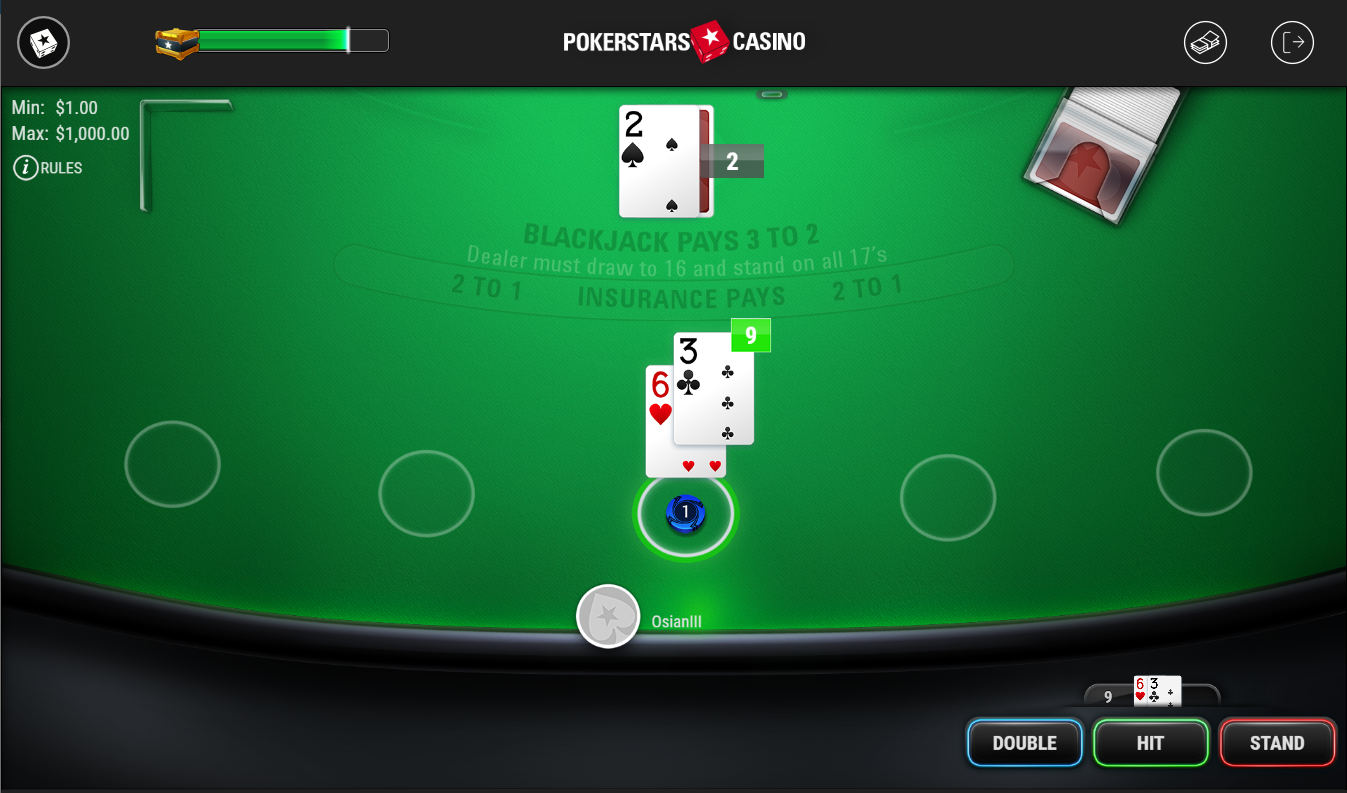

In [93]:
Image(IMAGES_FOLDER+"Initial_bet.png")

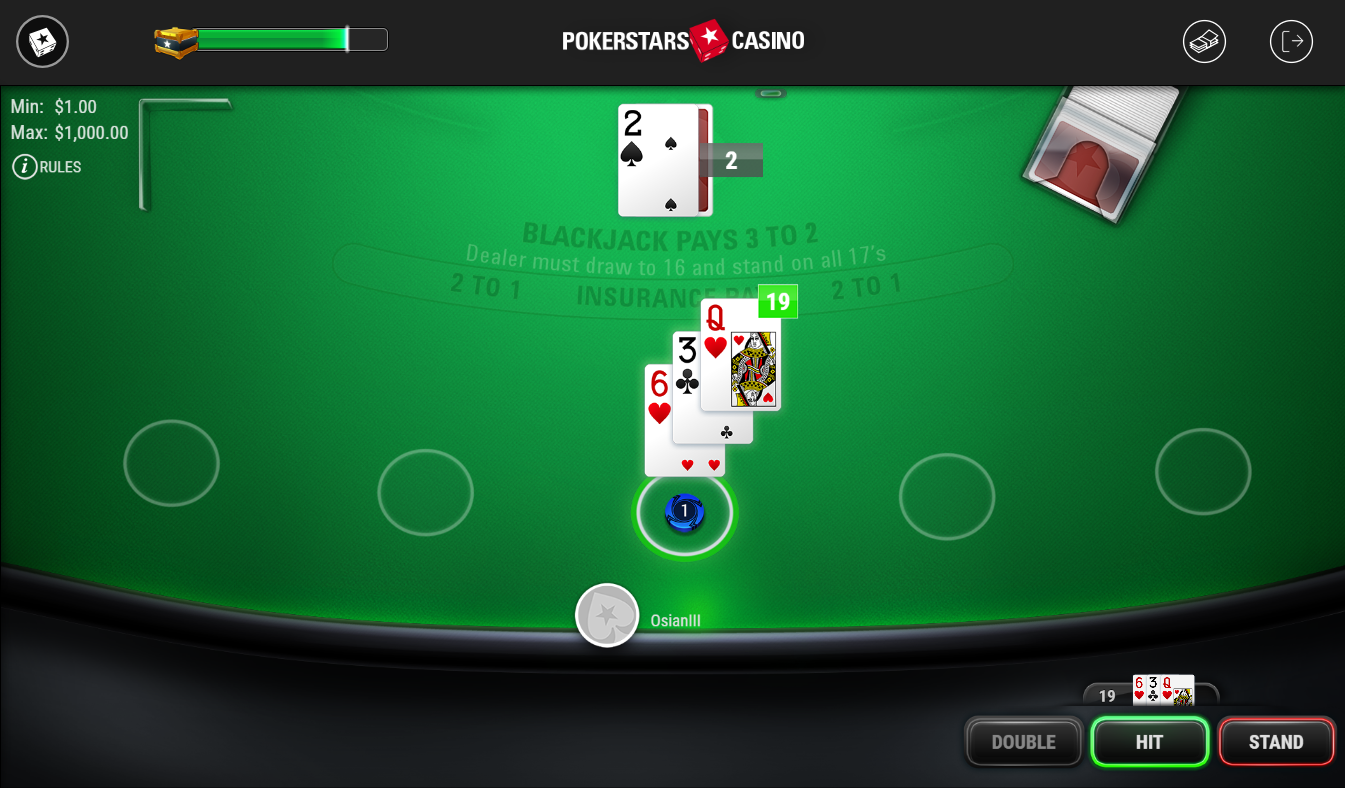

In [95]:
Image(IMAGES_FOLDER+"Player_action.png")

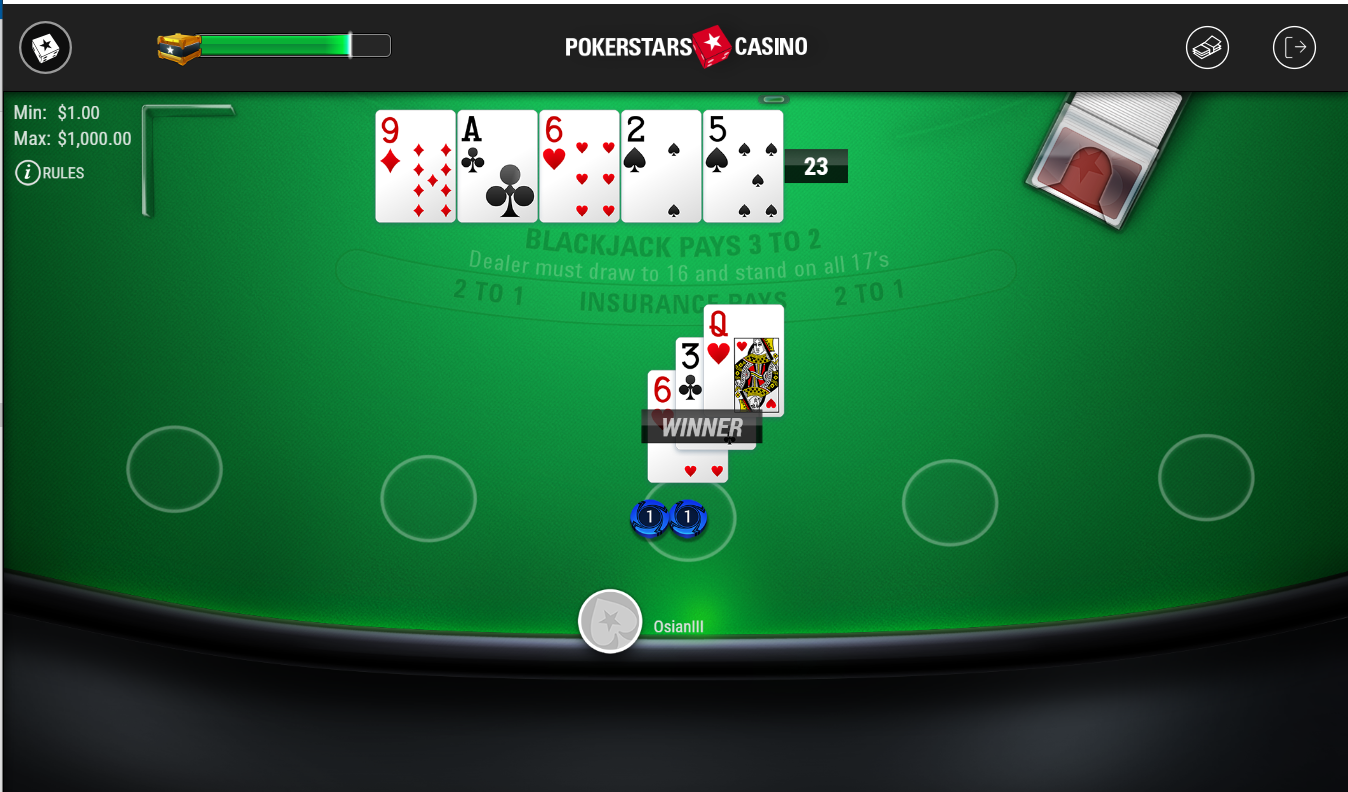

In [97]:
Image(IMAGES_FOLDER+"Dealer_action.png")

<br>
<br>
<br>
<br>
<font size="5">
Why is house favoured: 
    
* House edge comes from the fact that the player plays first and the hand is over (and the player loses) as soon as they bust their hand <br>
<br>
* All other player actions and possibilites (blackjack, split, double, surrender, insurance) act to make the house edge smaller <br>
<br>
* Depending on the rules,the house has 0.8% to 0.3% edge\*, (e.g., the expected value of a \$100 bet by a player is \$99.20 to \$99.70.) <br>
 <br>
 \*assuming the ``basic strategy''
<br>
<br>
<br>
<br>

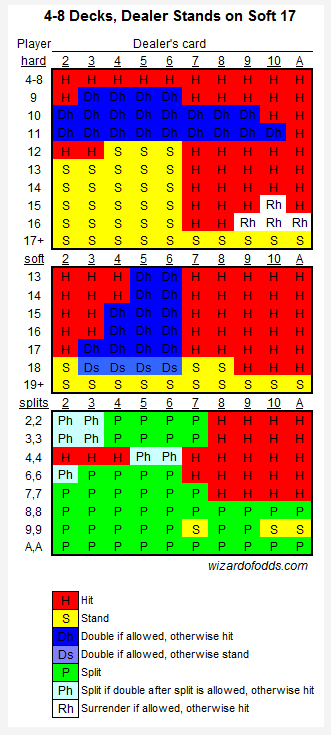

In [98]:
Image(IMAGES_FOLDER+"Basic_strategy.png")

## How does card counting work 

<br>
<br>
<br>
<br>
<font size="5">
* The rules for the dealer and the player are not the same <br>
<br>
* Deck that is rich in high cards (tens and aces) is benefical to the player <br>
    <br>
* Deck that is rich in low cards (2,3,4,5 and 6) is benefical to the dealer <br>
    <br>
* For example, hitting blackjack (ten + ace) is more benefical to the player because <br>
    <br>
    * If player hits the blackjack they get paid 150% of the bet <br>
    <br>
    * If the dealer hits the blackjack, they get paid ``only'' 100% of the bet <br>
    <br>
    
<br>
<br>
* As game proceeds the deck will swing from being ''high card rich'' and ''low card rich'' <br>
<br>
* We do not have to count _every_ card - we just have to differentiate between ''high cards'' and ''low cards'' <br>
<br>
* Add +1 to the count for every card dealt that is between 2 and 6 <br>
<br>
* Subtract -1 to the count for every card ten or ace <br>
<br>
<br>
* Excercise to the reader: what is the card count for this actual blackjack hand <br>
<br>
<br>
<br>
<br>

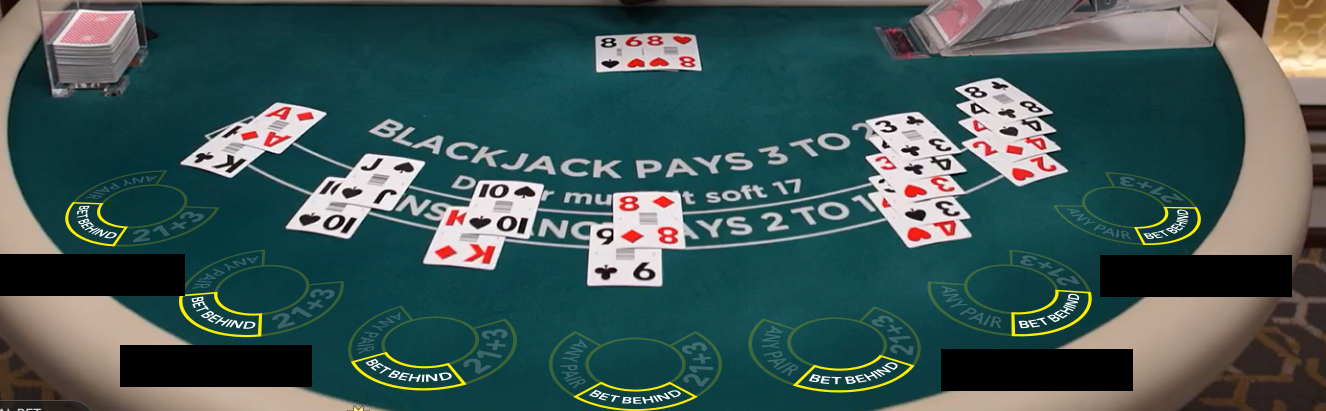

In [100]:
Image(IMAGES_FOLDER+"Live_Bj_Hand.png")

<font size="5">
<br>
<br>
<br>
<br>
* The count for the previous hand is +3 <br>
    <br>
* Therefore it is more advantageous to bet on the next hand  <br>
    <br>
* Every $\pm$ 1 in the count changes the player edge by approximately 0.5% <br>
    <br>
* Therefore, the game becomes advantageous for the player at count $\gtrsim$ 2   <br>
<br>
* But if there are more decks in the play, the change is effectively smaller   <br>
    <br>
* In the example, around 5 decks remain, so actual change to the true count is roughly $ \sim 0.6 $ - the game is still not profitable <br>
<br>
* Let's simulate! <br>
   
<br>  
<br>
<br>
<br>

## single simulation 

In [108]:
os.chdir("/Users/nevencaplar/Documents/Small/Poker/BlackJack-Simulator-master/")
import BlackJack as bj
from BlackJack import Game

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:17<00:00, 230.88it/s]


270114 hands overall, 67.53 hands per game on average
2734972.00 total bet
Overall winnings: 26236.00 (edge = 0.959 %)


Text(0.5, 0, 'hand in the shoe ')

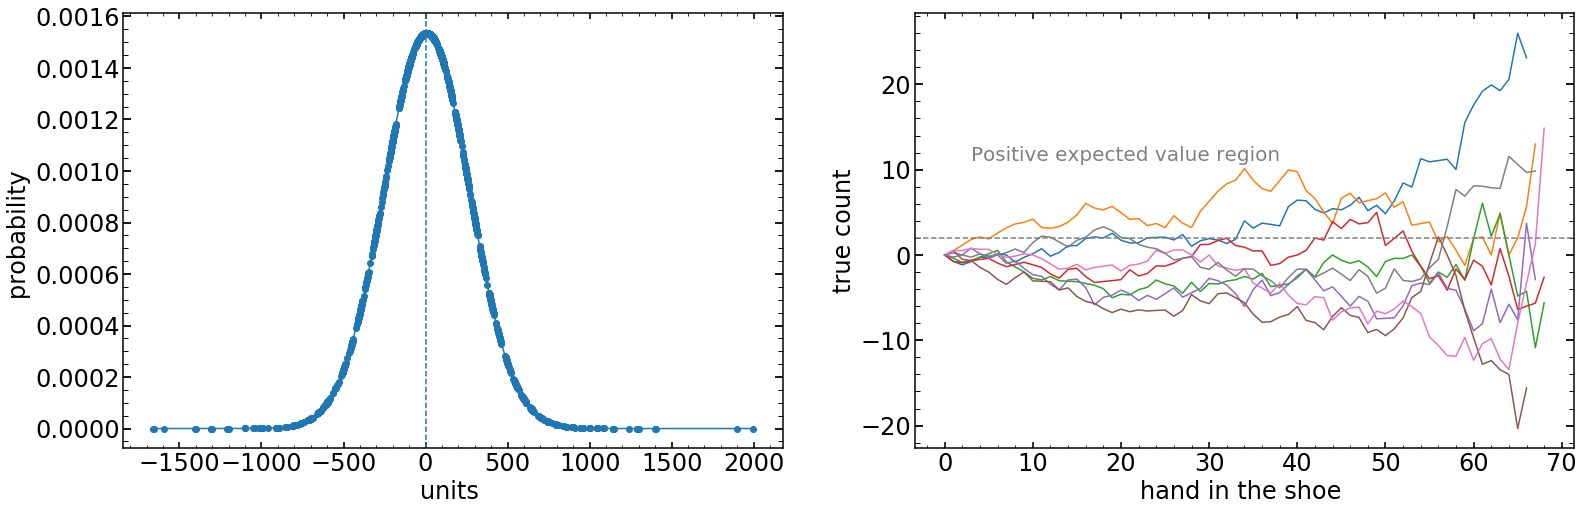

In [314]:
GAMES =4000

moneys = []
bets = []

list_of_single_game_player_hands=[]
list_of_single_game_dealer_hands=[]


countings = []
countings_per_game = []
list_of_single_game_moneys=[]
list_of_single_game_bets=[]
nb_hands = 0
for g in tqdm(range(GAMES)):

    game = Game(g+123456,number_of_boxes=1,BET_SPREAD=1,SHOE_PENETRATION=0.1)
    #game = Game(random.random())
    single_game_moneys=[]
    single_game_bets=[]
    while not game.shoe.reshuffle:
        #print('%s GAME no. %d %s' % (20 * '#', g + 1, 20 * '#'))
        game.play_round()
        single_game_moneys.append(game.get_money())
        single_game_bets.append(game.get_bet())
        nb_hands += 1
        
    list_of_single_game_moneys.append(single_game_moneys)
    list_of_single_game_bets.append(single_game_bets)
    list_of_single_game_player_hands.append(game.get_player_hand())
    list_of_single_game_dealer_hands.append(game.get_dealer_hand())    

    moneys.append(game.get_money())
    bets.append(game.get_bet())
    
    countings += game.shoe.count_history
    countings_per_game.append(np.array(game.shoe.count_history)[np.linspace(0,len(game.shoe.count_history)-1,len(single_game_bets)).astype(int)])
    #print("#########################################################################################################")
    #print("WIN for Game no. %d: %s (%s bet)" % (g + 1, "{0:.2f}".format(game.get_money()), "{0:.2f}".format(game.get_bet())))
    #print("#########################################################################################################")
    
sume = 0.0
total_bet = 0.0
for value in moneys:
    sume += value
for value in bets:
    total_bet += value

print("\n%d hands overall, %0.2f hands per game on average" % (nb_hands, float(nb_hands) / GAMES))
print("%0.2f total bet" % total_bet)
print("Overall winnings: {} (edge = {} %)".format("{0:.2f}".format(sume), "{0:.3f}".format(100.0*sume/total_bet)))

moneys = sorted(moneys)
fit = stats.norm.pdf(moneys, np.mean(moneys), np.std(moneys))  # this is a fitting indeed

plt.figure(figsize=(26,8))

plt.subplot(121)
plt.plot(moneys, fit, '-o')
plt.xlabel('units ')
plt.ylabel('probability ')
plt.axvline(0,ls='--')
#plt.hist(moneys, density=True)


plt.subplot(122)
plt.ylabel('true count')
plt.plot(countings_per_game[0], label='x')
plt.plot(countings_per_game[1], label='x')
plt.plot(countings_per_game[2], label='x')
plt.plot(countings_per_game[3], label='x')
plt.plot(countings_per_game[4], label='x')
plt.plot(countings_per_game[5], label='x')
plt.plot(countings_per_game[6], label='x')
plt.plot(countings_per_game[7], label='x')
plt.axhline(2,color='gray',ls='--')
plt.text(x=3,y=11, s= 'Positive expected value region ', color='gray')
plt.xlabel('hand in the shoe ')


## Edge as a function of bet spread and shoe penetration 

<font size="5">
<br>
<br>
<br>
<br>
* Card counting is not illegal - however casinos have number of defences <br>
<br>
* In New Jersey, casino can not ask the player to leave (Uston v. Resorts International Hotel, Inc, 89 N.J. 163, 445 A.2d 370, 1982 N.J.)     <br>
<br>
* Casino can improve their edge by limiting either bet spread or shoe penetration<br>    
<br>
* Let's simulate
   
   
<br>  
<br>
<br>
<br>

In [84]:
list_of_player_edge=[]
list_of_countings=[]
for BET_SPREAD_value in tqdm([1,2,5,10,20,50,100]):
    for SHOE_PENETRATION_value in [0.7,0.6,0.5,0.4,0.3,0.2,0.1]:

        GAMES =50000
        moneys = []
        bets = []

        list_of_single_game_player_hands=[]
        list_of_single_game_dealer_hands=[]

        countings = []
        list_of_single_game_moneys=[]
        list_of_single_game_bets=[]
        nb_hands = 0
        for g in range(GAMES):

            game = Game(g+123456,number_of_boxes=1,BET_SPREAD=BET_SPREAD_value,SHOE_PENETRATION=SHOE_PENETRATION_value)
            #game = Game(random.random())
            single_game_moneys=[]
            single_game_bets=[]
            while not game.shoe.reshuffle:
                #print('%s GAME no. %d %s' % (20 * '#', g + 1, 20 * '#'))
                game.play_round()
                single_game_moneys.append(game.get_money())
                single_game_bets.append(game.get_bet())
                nb_hands += 1

            list_of_single_game_moneys.append(single_game_moneys)
            list_of_single_game_bets.append(single_game_bets)
            list_of_single_game_player_hands.append(game.get_player_hand())
            list_of_single_game_dealer_hands.append(game.get_dealer_hand())    

            moneys.append(game.get_money())
            bets.append(game.get_bet())

            countings += game.shoe.count_history
            #print("#########################################################################################################")
            #print("WIN for Game no. %d: %s (%s bet)" % (g + 1, "{0:.2f}".format(game.get_money()), "{0:.2f}".format(game.get_bet())))
            #print("#########################################################################################################")

        sume = 0.0
        total_bet = 0.0
        for value in moneys:
            sume += value
        for value in bets:
            total_bet += value
            
        player_edge=(100.0*sume/total_bet)
        
        list_of_player_edge.append([BET_SPREAD_value,SHOE_PENETRATION_value,player_edge])
        list_of_countings.append([BET_SPREAD_value,SHOE_PENETRATION_value,len(np.array(countings)[np.array(countings)>6])/len(countings)])
        

array_of_player_edge=np.array(list_of_player_edge)
array_of_countings=np.array(list_of_countings)



#np.save('/Users/nevencaplar/Documents/Small/Poker/BlackJack-Simulator-master/array_of_player_edge',array_of_player_edge)
#np.save('/Users/nevencaplar/Documents/Small/Poker/BlackJack-Simulator-master/array_of_countings',array_of_countings)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [11:10:56<00:00, 5750.87s/it]


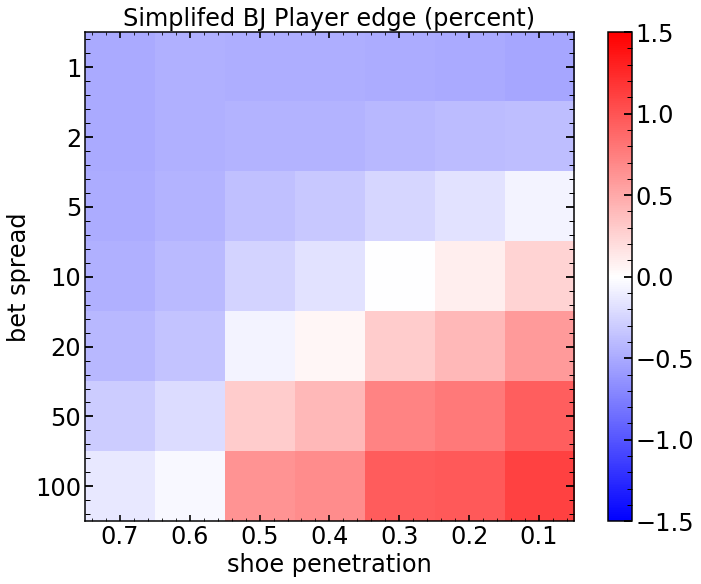

In [156]:
array_of_player_edge=np.load('/Users/nevencaplar/Documents/Small/Poker/BlackJack-Simulator-master/array_of_player_edge.npy')
#np.save('/Users/nevencaplar/Documents/Small/Poker/BlackJack-Simulator-master/array_of_countings',array_of_countings)

size = 7
# Limits for the extent
x_start = 0.0
x_end = 7
y_start = 0.0
y_end = 7

array_of_player_edge_reshaped=array_of_player_edge[:,2].reshape(7,7)

extent = [x_start, x_end, y_start, y_end]

fig=plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
im = ax.imshow(array_of_player_edge_reshaped,origin='upper', interpolation='None',extent=extent,vmax=1.5,vmin=-1.5,cmap='bwr')
#ax.set_xticks(ticks, minor=False)
ax.set_xticks(np.arange(7)+0.5)
ax.set_xticklabels(['0.7','0.6','0.5','0.4','0.3','0.2','0.1','9','8','7','6','5','4','3','2'])
ax.set_xlabel('shoe penetration')
ax.set_yticks(np.arange(7)+0.5)
ax.set_yticklabels(['100','50','20','10','5','2','1'])
ax.tick_params(axis='both', which='both', bottom='off', top='off',  right='off', left='off' )
ax.set_ylabel('bet spread')

ax.set_title('Simplifed BJ Player edge (percent)')


fig.colorbar(im)
plt.show()

# Online casino bonuses

## How do they work 

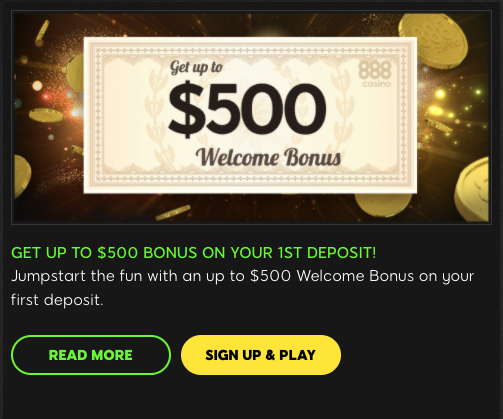

In [158]:
Image(IMAGES_FOLDER+"Welcome_offer.png")

<font size="5">
<br>
<br>
<br>
<br>
_Usually:_
* Casinos offer promotions in whch they grant player some ''bonus money'' <br>
    <br>
* ''Bonus money'' becomes real money only after the player plays through requirments <br>
    <br>
* Most often the requirment is to play through 25x the bonus amount, *if* the player plays slots <br>
<br>   
* If the player plays table games, such as blackjack or baccararat the requirement is between 150x to 300x times   <br>
    <br>
* For example, in order for player to earn the \$500 from above, the player has to play $150000 worth or blackjack or baccarat  <br>
    
<br>  
<br>
<br>
<br>

##  Shortest introduction to baccarat

<font size="5">
<br>
<br>
<br>
<br>
* The rules are irelevant for our purpose <br>  
     <br>  
* There is no strategy, counting or player decisions <br>  
     <br>  
* It is basically flipping a coin where one side wins 50.61% of time, but win awards only 195% of the bet <br>  
     <br>  
* House edge is 1.06%  <br>  
     <br>  
* Baccarat constitues around 85% of casino revenues in Macau (gaming revenu of Macau is around 4x larger than Las Vegas) <br>  
     <br>  
* Effective house edge, because players suboptimally take side bets is around 2.8%     <br>  
     <br>  
<br>  
<br>
<br>
<br>

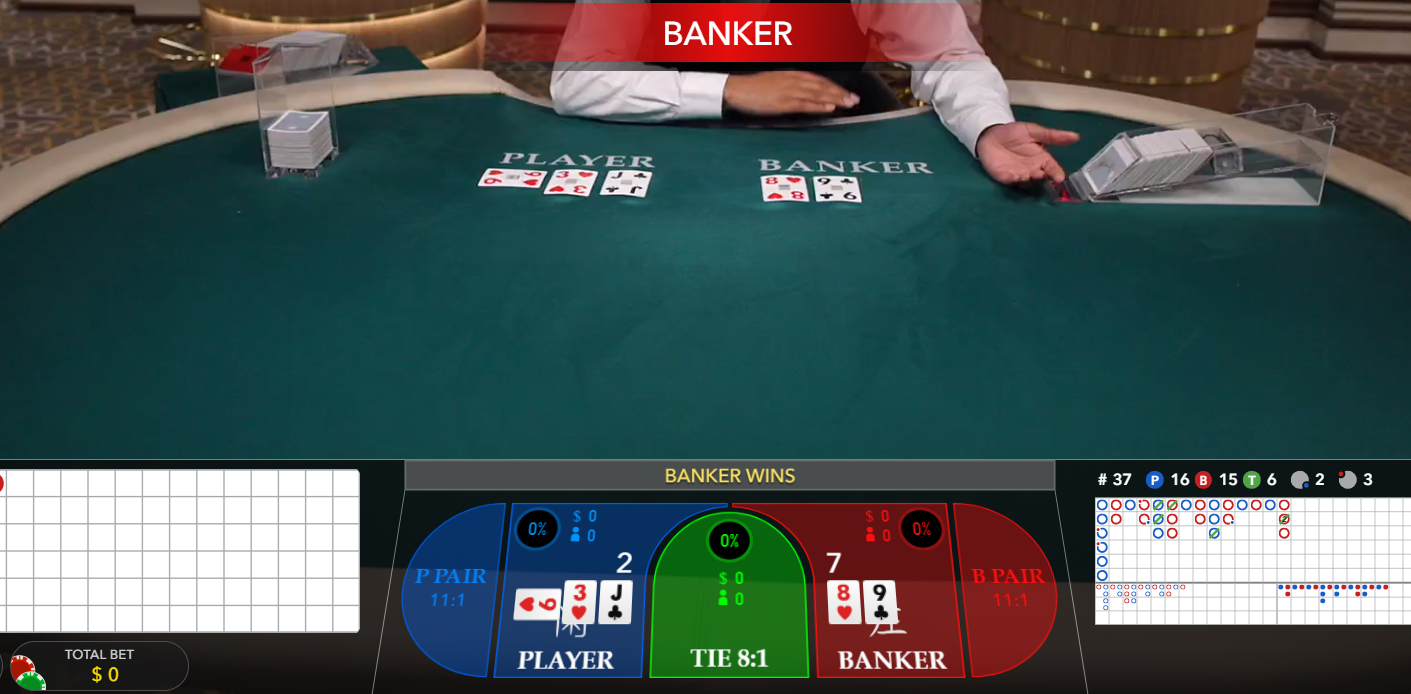

In [161]:
Image(IMAGES_FOLDER+"Baccarat.png")

## single simulation 

In [292]:
import copy
import random

played_through=0
random_number=random.random()

max_bet=5
#secondary_max_bet=5


fake_money_many_histories=[]
played_through_many_histories=[]

fake_money_init=20
played_through_requirment=(fake_money_init*5*40)

for i in tqdm(range(1,10000)):
    
    fake_money=fake_money_init
    played_through=0
    
    fake_money_single_history=[]
    played_through_single_history=[]
    
    while (fake_money >0) and (played_through < played_through_requirment):

        #if played_through < played_through_requirment/4:
        if fake_money <500 and (played_through < played_through_requirment/100):
            if fake_money<=max_bet:
                current_bet=fake_money
            else:
                current_bet=max_bet
        else:
            if fake_money<=secondary_max_bet:
                current_bet=fake_money
            else:
                current_bet=secondary_max_bet
                
        # checking if we are close to redemption
        if (played_through+current_bet)<played_through_requirment:
            # if we are not, use the ``normal'' bet
            current_bet=current_bet
        else:
            # if we are, just use the amount needed to get to the redemption value
            current_bet=played_through_requirment-played_through
        
        random.seed=i*72
        random_number=random.random()
        if random_number < 0.4462:
            # player wins
            fake_money -=current_bet
            played_through += current_bet
        elif (random_number > 0.4462) and (random_number < 0.4462 +0.0953) :
            fake_money=fake_money
            played_through += current_bet
        elif (random_number > 0.4462 +0.0953) :
            fake_money+=(current_bet*0.95)
            played_through += current_bet

        #print([fake_money,played_through])
        fake_money_single_history.append(fake_money)
        played_through_single_history.append(played_through)
        
    played_through_many_histories.append(played_through_single_history)
    fake_money_many_histories.append(fake_money_single_history)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:01<00:00, 5902.07it/s]


In [309]:
len_of_histories=[]
for i in range(len(fake_money_many_histories)):
    len_of_histories.append(len(fake_money_many_histories[i]))

fake_money_many_histories_with_zeros=[]
for i in tqdm(range(len(fake_money_many_histories))):
#for i in tqdm(range(2500)):
    fake_money_many_histories_with_zeros_single=[20]
    for j in range(np.max(len_of_histories)):
        try:
            fake_money_many_histories_with_zeros_single.append(fake_money_many_histories[i][j])
        except:
            if j>750:
                fake_money_many_histories_with_zeros_single.append(fake_money_many_histories_with_zeros_single[-1])
            else:
                fake_money_many_histories_with_zeros_single.append(0)    
                
    fake_money_many_histories_with_zeros.append(fake_money_many_histories_with_zeros_single)
    
    
toy_df = pd.DataFrame(np.transpose(fake_money_many_histories_with_zeros[2100:2150]),index=np.arange(0,(np.max(len_of_histories)+1)*5,5)  )

fake_money_many_histories_with_zeros=np.array(fake_money_many_histories_with_zeros)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:08<00:00, 1149.18it/s]


In [310]:
 from bokeh.server.server import Server
 from bokeh.application import Application
 from bokeh.application.handlers.function import FunctionHandler
 from bokeh.plotting import figure, ColumnDataSource
 from bokeh.core.properties import field
 from bokeh.models import (HoverTool, SingleIntervalTicker,
                           Slider, Button, Label, CategoricalColorMapper)
 from bokeh.palettes import Spectral6 
 import numpy as np
 import pandas as pd


def make_document(doc):

    
    numlines=len(toy_df.columns)
    mypalette=Turbo256[0:numlines*5:5]

    output_notebook()

    plot = Figure(plot_width=1600, plot_height=500, x_range=(0, 1), x_axis_label='Played through [$]', y_axis_label='Bonus value [$]')

    plot.multi_line(xs=[toy_df.index.values]*numlines,
                    ys=[toy_df[name].values for name in toy_df],
                    line_color=mypalette,
                    line_width=5)
    
    plot.xaxis.major_label_text_font_size = "16pt"
    plot.yaxis.major_label_text_font_size = "16pt"
    plot.title.text_font_size = '16pt'
    plot.xaxis.axis_label_text_font_size = "20pt"
    plot.yaxis.axis_label_text_font_size = "20pt"
    
    plot.title.text='Converting $20 bonus via 5$ baccarat bets'

    def animate_update():
        plot.x_range.end = slider.value + 5
        if plot.x_range.end > 4000:
            plot.x_range.end =4000
        slider.value = plot.x_range.end


    def slider_update(attrname, old, new):
        
        plot.x_range.start=0 
        plot.x_range.end=slider.value 

        
        #plot.x_range = slider.value
        #label.text = str(plot.x_range)
        #source.data = data[year]
        
        
    slider = Slider(start=0, end=4000, value=0, step=5, title="Played through [$]")
    slider.on_change('value', slider_update)

    callback_id = None

    def animate():
        global callback_id
        if button.label == '► Play':
            button.label = '❚❚ Pause'
            callback_id = doc.add_periodic_callback(animate_update, 20)
        else:
            button.label = '► Play'
            doc.remove_periodic_callback(callback_id)

    button = Button(label='► Play', width=60)
    button.on_click(animate)    

    doc.add_root(button)
    doc.add_root(slider)
    doc.add_root(plot)

apps = {'/': Application(FunctionHandler(make_document))}

server = Server(apps, port=5015)
server.start()

Loading BokehJS ...

## many simulation as a function of bet size (variance)

In [ ]:
res=[]
max_bet_casino=2000
for fake_money_init in [5,20,50,100,250,500]:
    for max_bet in [1,2,5,10,20,50,100,200,500,1000,2000]:

        secondary_max_bet=max_bet
        fake_money_many_histories=[]
        played_through_many_histories=[]

        
        played_through_requirment=(fake_money_init*5*40)

        for i in tqdm(range(1,int(5000*(max_bet/fake_money_init)**0.1))):

            fake_money=fake_money_init
            played_through=0

            fake_money_single_history=[]
            played_through_single_history=[]

            while (fake_money >0) and (played_through < played_through_requirment):

                #if you have less money then max_casino_bet
                if fake_money <max_bet_casino:
                    if fake_money<=max_bet:
                        current_bet=fake_money
                    else:
                        current_bet=max_bet
                else:
                    # if you have more than max_casino_bet, you have to bet that amount
                    current_bet=max_bet_casino

                # checking if we are close to redemption
                if (played_through+current_bet)<played_through_requirment:
                    # if we are not, use the ``normal'' bet
                    current_bet=current_bet
                else:
                    # if we are close to redemption, just use the amount needed to get to the redemption value
                    current_bet=played_through_requirment-played_through                

                random_number=random.random()
                if random_number < 0.4462:
                    # player wins
                    fake_money -=current_bet
                    played_through += current_bet
                elif (random_number > 0.4462) and (random_number < 0.4462 +0.0953) :
                    fake_money=fake_money
                    played_through += current_bet
                elif (random_number > 0.4462 +0.0953) :
                    fake_money+=(current_bet*0.95)
                    played_through += current_bet

                #print([fake_money,played_through])
                fake_money_single_history.append(fake_money)
                played_through_single_history.append(played_through)

            played_through_many_histories.append(played_through_single_history)
            fake_money_many_histories.append(fake_money_single_history)

            final_money_many_histories=[]
            for i in range(len(fake_money_many_histories)):
                final_money_many_histories.append(fake_money_many_histories[i][-1])

        final_money_many_histories=np.array(final_money_many_histories)

        mean_sample=[]
        conversion_sample=[]
        for i in range(100):
            bootstrap_resampled_final_money_many_histories=bootstrap_resample(final_money_many_histories)
            mean_sample.append(np.mean(bootstrap_resampled_final_money_many_histories))
            conversion_sample.append(float(len(np.array(bootstrap_resampled_final_money_many_histories)[np.array(bootstrap_resampled_final_money_many_histories)>0]))/len(final_money_many_histories))


        mean_of_mean_sample=np.mean(mean_sample)
        std_of_mean_sample=np.std(mean_sample)
        mean_of_conversion_sample=np.mean(conversion_sample)
        std_of_conversion_sample=np.std(conversion_sample)          

        # fake_money_init,max bet, fraction of time you convert, value of bonu
        res.append([fake_money_init,max_bet,mean_of_conversion_sample,mean_of_mean_sample,std_of_conversion_sample,std_of_mean_sample])

res=np.array(res)

np.save('/Users/nevencaplar/Documents/Small/Poker/BlackJack-Simulator-master/res',res)

In [178]:
res=np.load('/Users/nevencaplar/Documents/Small/Poker/BlackJack-Simulator-master/res.npy')
res_5=res[res[:,0]==5]
res_5=res_5[:,[1,2,3,4,5]]
res_20=res[res[:,0]==20]
res_20=res_20[:,[1,2,3,4,5]]
res_50=res[res[:,0]==50]
res_50=res_50[:,[1,2,3,4,5]]
res_100=res[res[:,0]==100]
res_100=res_100[:,[1,2,3,4,5]]
res_250=res[res[:,0]==250]
res_250=res_250[:,[1,2,3,4,5]]
res_500=res[res[:,0]==500]
res_500=res_500[:,[1,2,3,4,5]]

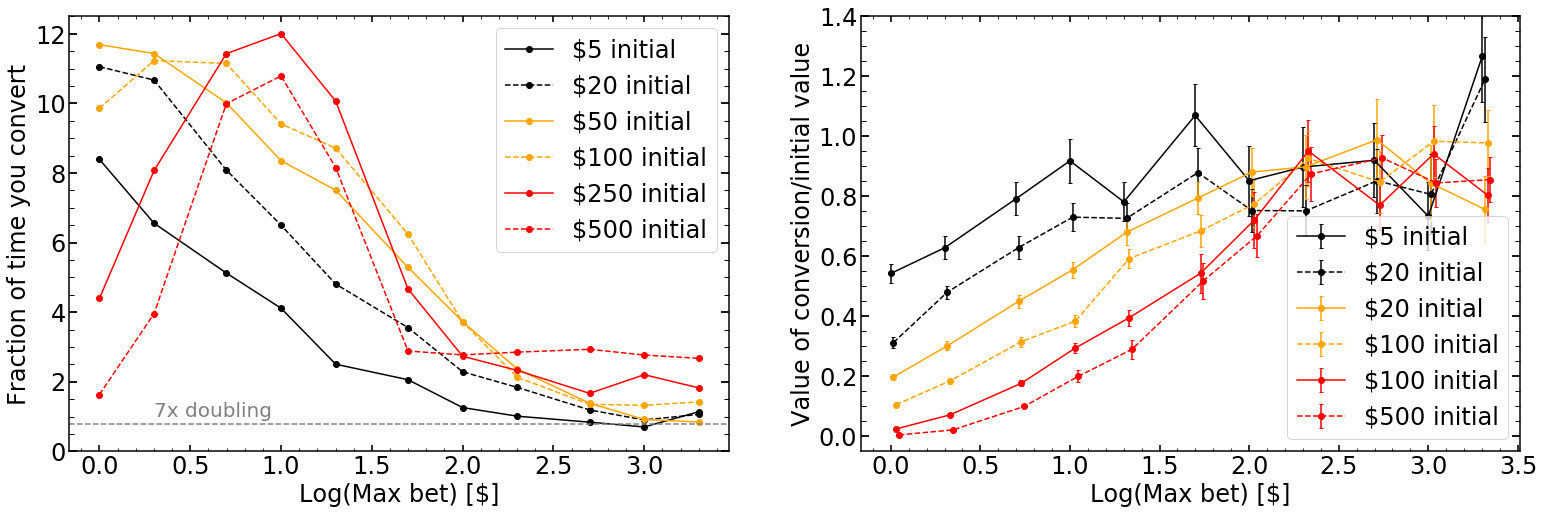

In [304]:
plt.figure(figsize=(26,8))
plt.subplot(121)
plt.plot(np.log10(res_5[:,0]),100*res_5[:,1],marker='o',color='black',label='$5 initial')
plt.plot(np.log10(res_20[:,0]),100*res_20[:,1],marker='o',color='black',label='$20 initial',ls='--')
plt.plot(np.log10(res_50[:,0]),100*res_50[:,1],marker='o',color='orange',label='$50 initial')
plt.plot(np.log10(res_100[:,0]),100*res_100[:,1],marker='o',color='orange',label='$100 initial',ls='--')
plt.plot(np.log10(res_250[:,0]),100*res_250[:,1],marker='o',color='red',label='$250 initial')
plt.plot(np.log10(res_500[:,0]),100*res_500[:,1],marker='o',color='red',label='$500 initial',ls='--')

plt.axhline((1/2)**7*100,color='gray',ls='--')
plt.text(x=0.3,y=1,s='7x doubling',color='gray')
plt.xlabel('Log(Max bet) [$]')
plt.ylabel('Fraction of time you convert')
plt.legend()
plt.ylim(0,12.5)

plt.subplot(122)
plt.errorbar(np.log10(res_5[:,0]),res_5[:,2]/5,yerr=res_5[:,4]/5,marker='o',color='black',capsize=2,label='$5 initial')
plt.errorbar(np.log10(res_20[:,0])+0.015,res_20[:,2]/20,yerr=res_20[:,4]/20,marker='o',color='black',capsize=2,label='$20 initial',ls='--')
plt.errorbar(np.log10(res_50[:,0])+0.015,res_50[:,2]/50,yerr=res_50[:,4]/50,marker='o',color='orange',capsize=2,label='$20 initial')
plt.errorbar(np.log10(res_100[:,0])+0.03,res_100[:,2]/100,yerr=res_100[:,4]/100,marker='o',color='orange',capsize=2,label='$100 initial',ls='--')
plt.errorbar(np.log10(res_250[:,0])+0.03,res_250[:,2]/250,yerr=res_250[:,4]/250,marker='o',color='red',capsize=2,label='$100 initial')
plt.errorbar(np.log10(res_500[:,0])+0.045,res_500[:,2]/500,yerr=res_500[:,4]/500,marker='o',color='red',capsize=2,label='$500 initial',ls='--')
plt.xlabel('Log(Max bet) [$]')
plt.ylabel('Value of conversion/initial value')
plt.ylim(-0.05,1.4)
plt.legend()

In [291]:
 from bokeh.server.server import Server
 from bokeh.application import Application
 from bokeh.application.handlers.function import FunctionHandler
 from bokeh.plotting import figure, ColumnDataSource
 from bokeh.core.properties import field
 from bokeh.models import (HoverTool, SingleIntervalTicker,
                           Slider, Button, Label, CategoricalColorMapper)
 from bokeh.palettes import Spectral6 
 import numpy as np
 import pandas as pd


def make_document(doc):

    
    numlines=len(toy_df.columns)
    mypalette=Turbo256[0:numlines*5:5]

    output_notebook()

    plot = Figure(plot_width=1600, plot_height=500, x_range=(0, 1), x_axis_label='Played through [$]', y_axis_label='Bonus value [$]')

    plot.multi_line(xs=[toy_df.index.values]*numlines,
                    ys=[toy_df[name].values for name in toy_df],
                    line_color=mypalette,
                    line_width=5)
    
    plot.xaxis.major_label_text_font_size = "16pt"
    plot.yaxis.major_label_text_font_size = "16pt"
    plot.title.text_font_size = '16pt'
    plot.xaxis.axis_label_text_font_size = "20pt"
    plot.yaxis.axis_label_text_font_size = "20pt"
    
    plot.title.text='Converting $20 bonus via 5$ baccarat bets'

    def animate_update():
        plot.x_range.end = slider.value + 5
        if plot.x_range.end > 4000:
            plot.x_range.end =4000
        slider.value = plot.x_range.end


    def slider_update(attrname, old, new):
        
        plot.x_range.start=0 
        plot.x_range.end=slider.value 

        
        #plot.x_range = slider.value
        #label.text = str(plot.x_range)
        #source.data = data[year]
        
        
    slider = Slider(start=0, end=4000, value=0, step=5, title="Played through [$]")
    slider.on_change('value', slider_update)

    callback_id = None

    def animate():
        global callback_id
        if button.label == '► Play':
            button.label = '❚❚ Pause'
            callback_id = doc.add_periodic_callback(animate_update, 20)
        else:
            button.label = '► Play'
            doc.remove_periodic_callback(callback_id)

    button = Button(label='► Play', width=60)
    button.on_click(animate)    

    doc.add_root(button)
    doc.add_root(slider)
    doc.add_root(plot)

apps = {'/': Application(FunctionHandler(make_document))}

server = Server(apps, port=5013)
server.start()

Loading BokehJS ...

In [229]:
from bokeh.palettes import Spectral11,Turbo256
from bokeh.plotting import figure, show, output_notebook
#output_file('temp.html')

#toy_df = pd.DataFrame(data=np.random.rand(800,3), columns = ('a', 'b' ,'c'))   

numlines=len(toy_df.columns)
mypalette=Turbo256[0:numlines*5:5]

output_notebook()

plot = Figure(plot_width=1600, plot_height=500, x_range=(0, 1))

plot.multi_line(xs=[toy_df.index.values]*numlines,
                ys=[toy_df[name].values for name in toy_df],
                line_color=mypalette,
                line_width=5)
callback = CustomJS(args=dict(x_range=plot.x_range), code="""
    var start = cb_obj.value
    x_range.setv({"start": 0, "end": start+10})
""")
slider = Slider (start=0, end=4020, value=0, step=5)
slider.js_on_change('value', callback)

layout = column(slider, plot)
show(layout)


Loading BokehJS ...